Text(0, 0.5, 'AUC value')

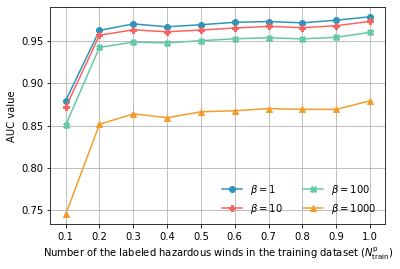

In [12]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import scipy.io as scio
import numpy as np
import random
import sklearn.svm as svm
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.svm import SVC
from tools import *
from sklearn.manifold import TSNE
from Data_import import data_frame
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
all_colors = ['#2E94B9', "#fa625f", '#62C8A5', '#f29c2b']
semi_ratios = np.arange(0.1,1.1,0.1)
AUCs = np.zeros((len(semi_ratios),4))
for count,id_ratio in enumerate(range(len(semi_ratios))):
    metric_values_iterations_dims = scio.loadmat(f'./results_save/metric_values_hazrd_labels_num10_{semi_ratios[id_ratio]*10}_1000.mat')
    metric_values = metric_values_iterations_dims['metric_values']
    ACC_TRAIN = metric_values['ACC_TRAIN'][0,0]
    PTA = metric_values['PTA'][0,0]
    ACC_TEST = metric_values['ACC_TEST'][0,0]
    AUC = metric_values['AUC'][0,0]
    CSI = metric_values['CSI'][0,0]
#     selected_index = np.argmax(np.sum(AUC,axis = 1))
    selected_index = 500
    AUCs[count,::] = AUC[selected_index,::]

plt.plot(semi_ratios, AUCs[::,0],'o-', color = all_colors[0], label = r'$\beta=1$')
plt.plot(semi_ratios, AUCs[::,1],'P-', color = all_colors[1], label = r'$\beta=10$')
plt.plot(semi_ratios, AUCs[::,2],'X-', color = all_colors[2], label = r'$\beta=100$')
plt.plot(semi_ratios, AUCs[::,3],'^-', color = all_colors[3], label = r'$\beta=1000$')
plt.grid()
plt.xticks(semi_ratios,np.round(semi_ratios,2) )
plt.legend(frameon=False, ncol=2)
plt.xlabel(r'Number of the labeled hazardous winds in the training dataset ($N_{\rm train}^{\rm{p}}$)')
plt.ylabel('AUC value')
# plt.savefig(f'../figures/auc_with_calm_num.png',dpi=600)
# plt.savefig(f'../figures/auc_with_calm_num.pdf')